# Exhibitors_profile_analysis -EDA

In [49]:
import pandas as pd



In [11]:
exhibitor_final = pd.read_csv("exhibitor_final.csv")

In [13]:
exhibitor_final.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   exhibitorid   183 non-null    int64 
 1   Name          183 non-null    object
 2   categoryId    183 non-null    int64 
 3   categoryName  183 non-null    object
dtypes: int64(2), object(2)
memory usage: 5.8+ KB


In [15]:
exhibitor_final.describe()

,exhibitorid,categoryId
count,183.000000,183.000000
mean,56908.169399,52317.819672
std,30408.755090,30.190699
min,10846.000000,52271.000000
25%,21865.000000,52289.000000
50%,55311.000000,52321.000000
75%,92462.000000,52344.500000
max,98889.000000,52366.000000


In [24]:
exhibitor_final['categoryName'].value_counts().head(10)


categoryName
12.2 NTO: National tourism office            5
14.6 Gastro tourism                          5
1.3 Hostel / Motel                           5
3.2 Authorized travel agency                 4
17.2 Payment service provider                4
4.1 Search engine for travel / Aggregator    4
5.5 Helicopter services                      4
15.1 Print media                             4
1.5 Resort hotel                             3
3. Travel  agencies                          3
Name: count, dtype: int64

In [26]:
category_counts = exhibitor_final['categoryName'].value_counts()

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

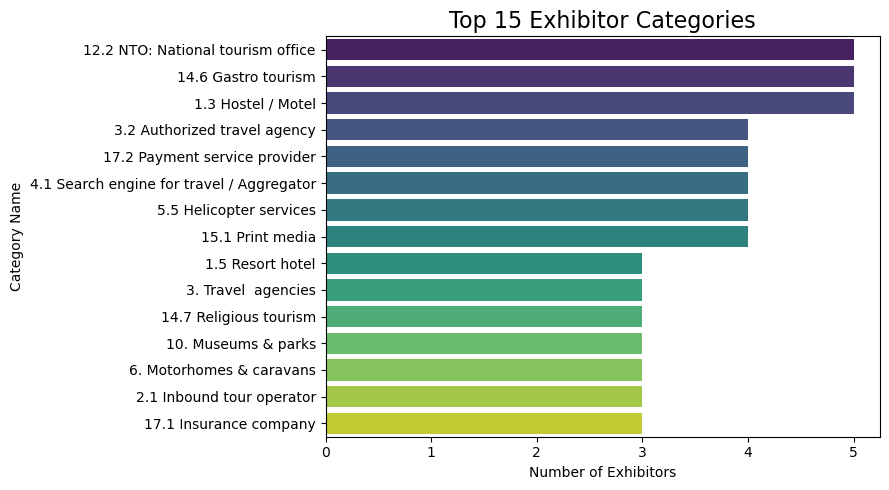

In [55]:
# Bar Plot - Top 15 Categories
plt.figure(figsize=(9, 5))
sns.barplot(
    x=category_counts.values[:15],
    y=category_counts.index[:15],
    hue=category_counts.index[:15],
    palette="viridis",
    legend=False
)

plt.title("Top 15 Exhibitor Categories", fontsize=16)
plt.xlabel("Number of Exhibitors")
plt.ylabel("Category Name")
plt.tight_layout()
plt.savefig("top_categories_barplot.png")
plt.show()

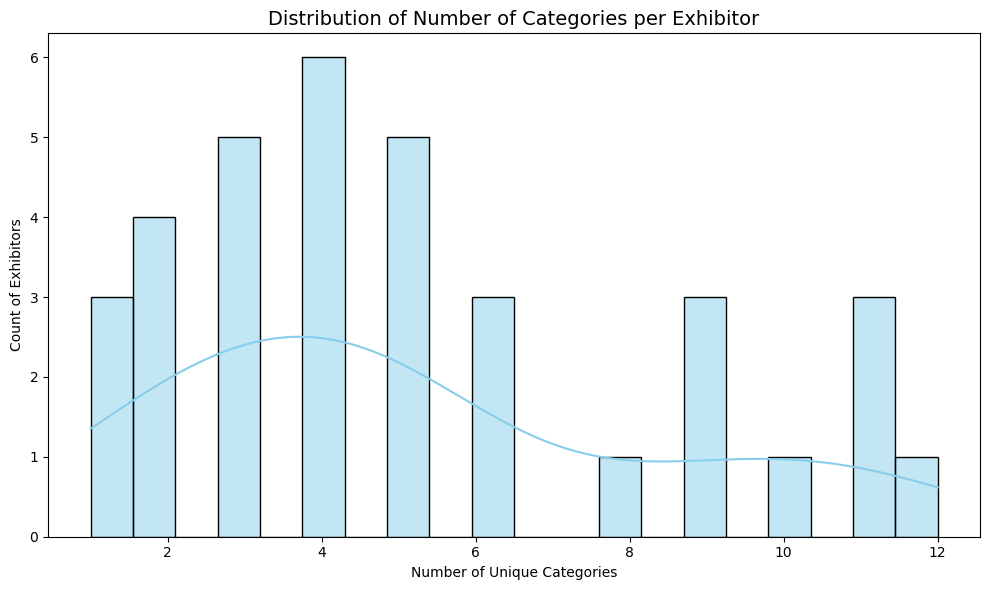

In [32]:
# Number of Categories per Exhibitor
category_per_exhibitor = exhibitor_final.groupby('exhibitorid')['categoryId'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(category_per_exhibitor, bins=20, kde=True, color='skyblue')
plt.title("Distribution of Number of Categories per Exhibitor", fontsize=14)
plt.xlabel("Number of Unique Categories")
plt.ylabel("Count of Exhibitors")
plt.tight_layout()
plt.savefig("category_per_exhibitor_dist.png")
plt.show()


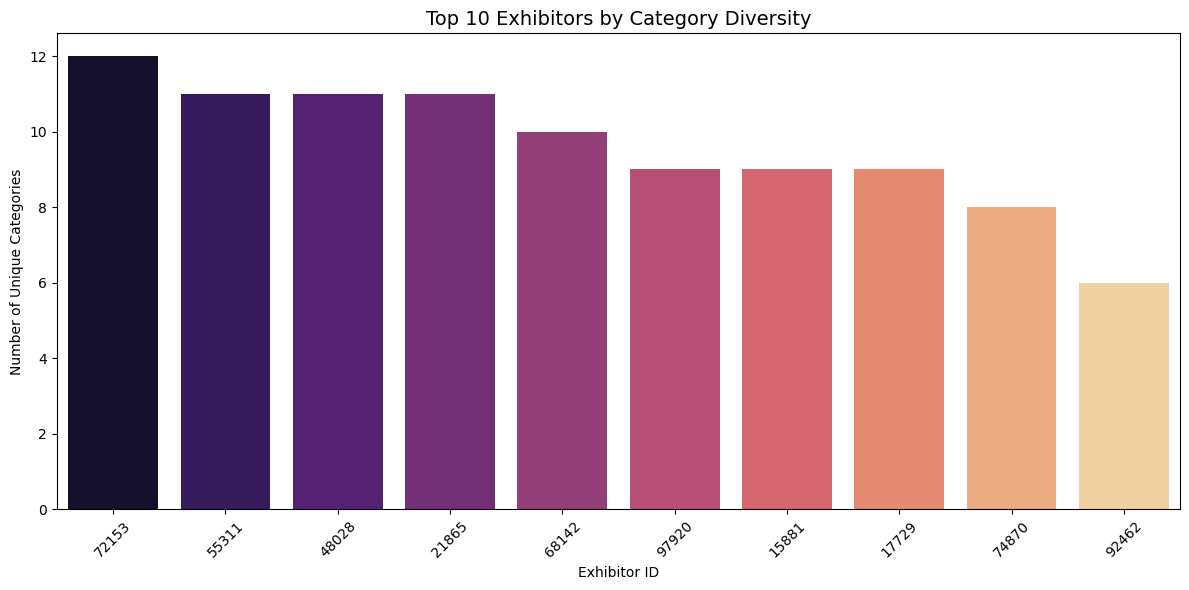

In [40]:
# Top Exhibitors by Category Diversity
top_exhibitors = category_per_exhibitor.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_exhibitors.index.astype(str), y=top_exhibitors.values, hue=top_exhibitors.index.astype(str), palette="magma", legend=False)

plt.title("Top 10 Exhibitors by Category Diversity", fontsize=14)
plt.xlabel("Exhibitor ID")
plt.ylabel("Number of Unique Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_exhibitors_diversity.png")
plt.show()

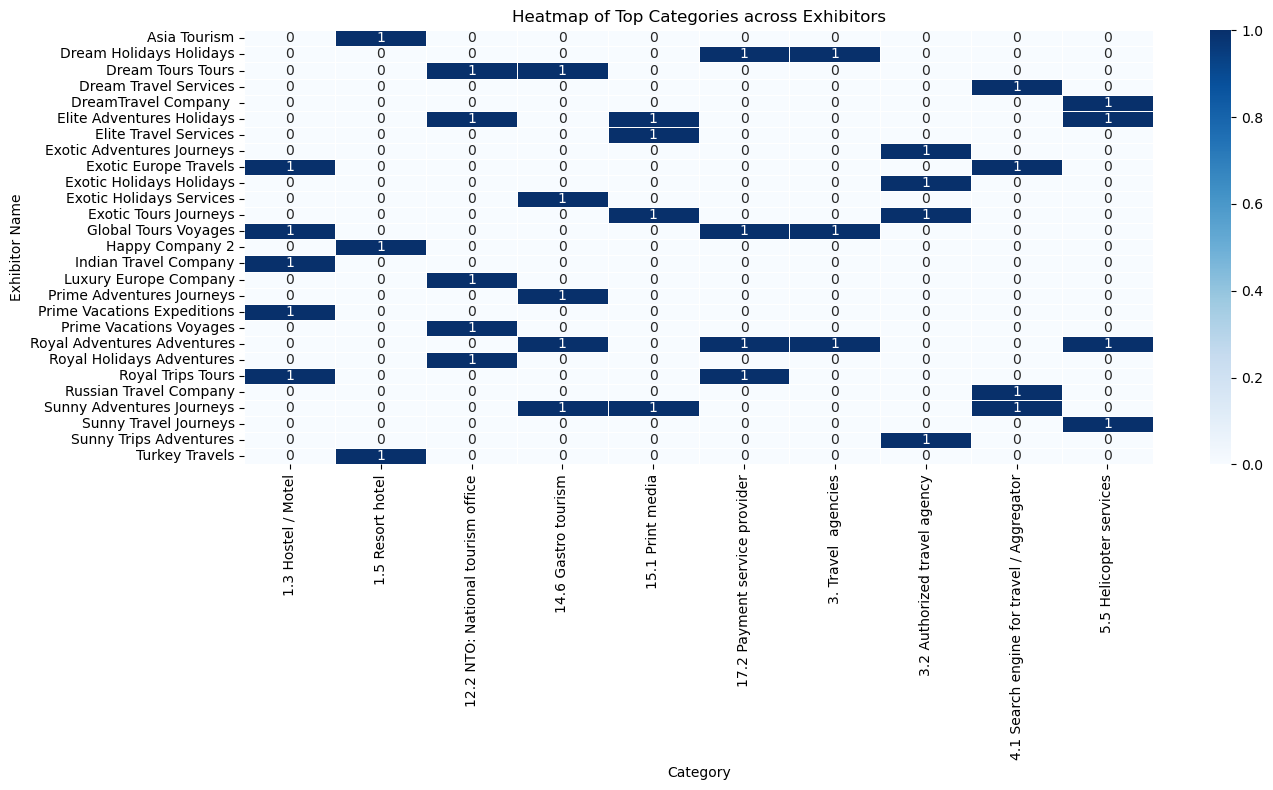

In [36]:
# Heatmap of Exhibitor vs Top Categories
top_categories = category_counts.head(10).index.tolist()
filtered_df = exhibitor_final[exhibitor_final['categoryName'].isin(top_categories)]

pivot_table = pd.crosstab(filtered_df['Name'], filtered_df['categoryName'])

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="Blues", linewidths=0.5, annot=True, fmt='d')
plt.title("Heatmap of Top Categories across Exhibitors")
plt.xlabel("Category")
plt.ylabel("Exhibitor Name")
plt.tight_layout()
plt.savefig("exhibitor_category_heatmap.png")
plt.show()


In [38]:
# Save Category Summary to CSV

category_counts.to_csv("category_summary.csv", header=True)